# **20230614**

## 5장 선형회귀 모델: 먼저 긋고 수정하기

### 01 경사하강법(gradient decent)의 개요


loss(오차) = $y - \hat{y}$

최소 오차 $ \rightarrow \mathrm{loss min} = y_i - (w_{i+1} * x_i + w_i) $ <br>
$ \Rightarrow L = f(w^2) $ 


<br>
<br>

$ f'(w) = \frac{\partial f}{\partial w} = \mathrm{loss} $



$ W_{i+1} = W_i - \alpha * \frac{\partial f}{\partial w} \qquad  \alpha $ : 학습률
<br>

$ W_{i+1} \approx W_i = \mathrm{loss min} $

### 02 파이썬 코딩으로 확인하는 선형 회귀

### 03 다중 선형 회귀의 개요

### 04 파이썬 코딩으로 확인하는 다중 선형 회귀

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
x1 = np.array([2,4,6,8])
x2 = np.array([0,4,2,3])
y= np.array([81,93,91,97])

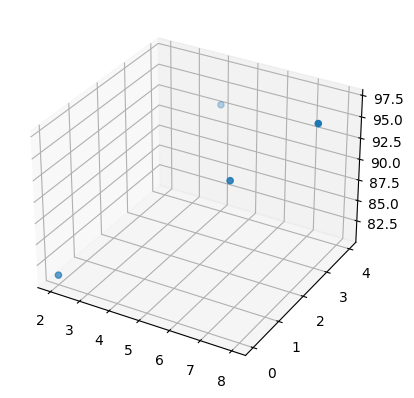

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter3D(x1,x2,y)
plt.show()

### 05 텐서플로에서 실행하는선형회귀, 다중 선형 회귀 모델


- 모델의 성능은 원래답의 분포가 결정함

- 손실함수(loss) = 오차 구하기
- 옵티마이저(optimizer) = 최소 오차 구하기

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense       # 밀집층

#### 선형회귀 실습

In [6]:
x = np.array([2,4,6,8])
y= np.array([81,93,91,97])

model = Sequential()

model.add(Dense(1,input_dim=1, activation='linear'))          # 선형

# sgd : 경사하강법 = 오차수정, mse: 평균제곱오차 = 오차구하기
# loss function에 의해 회귀/분류 결정됨
model.compile(optimizer='sgd',loss='mse')                     # 회귀

# 전체 데이터 한번 학습 :1 epoch
model.fit(x, y, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 316ms/step - loss: 6951.0527
Epoch 2/1000
1/1 [==============================] - 0s 5ms/step - loss: 1858.3081
Epoch 3/1000
1/1 [==============================] - 0s 6ms/step - loss: 1104.9348
Epoch 4/1000
1/1 [==============================] - 0s 7ms/step - loss: 988.9420
Epoch 5/1000
1/1 [==============================] - 0s 6ms/step - loss: 966.5988
Epoch 6/1000
1/1 [==============================] - 0s 10ms/step - loss: 958.0446
Epoch 7/1000
1/1 [==============================] - 0s 8ms/step - loss: 951.5502
Epoch 8/1000
1/1 [==============================] - 0s 6ms/step - loss: 945.3918
Epoch 9/1000
1/1 [==============================] - 0s 10ms/step - loss: 939.3167
Epoch 10/1000
1/1 [==============================] - 0s 7ms/step - loss: 933.2872
Epoch 11/1000
1/1 [==============================] - 0s 9ms/step - loss: 927.2977
Epoch 12/1000
1/1 [==============================] - 0s 9ms/step - loss: 921.3472
Epoch 13/1000
1/1 

1/1 [==============================] - 0s 133ms/step


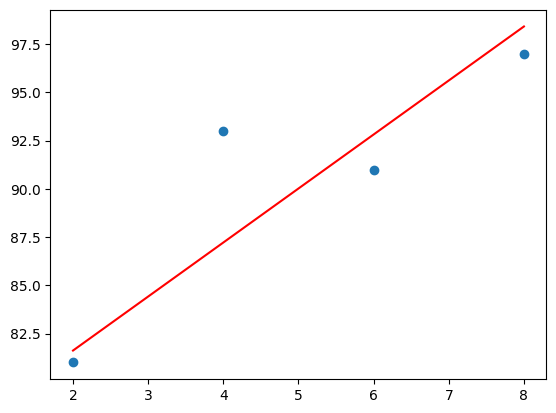

In [7]:
plt.scatter(x,y)
plt.plot(x,model.predict(x),'r')
plt.show()

In [8]:
hour = 7
prediction = model.predict([hour])
print('%.f 시간을 공부할 경우의 예상 점수는 %.02f점입니다.'%(hour,prediction))

1/1 [==============================] - 0s 50ms/step
7 시간을 공부할 경우의 예상 점수는 95.62점입니다.


#### 다중 선형 회귀 실습

In [13]:
x = np.array([[2,0],[4,4],[6,2],[8,3]])
y = np.array([81,93,91,97])

In [14]:
model = Sequential()

model.add(Dense(1, input_dim=2, activation='linear'))
model.compile(optimizer='sgd',loss='mse')

model.fit(x,y,epochs=2000)


Epoch 1/2000
1/1 [==============================] - 0s 325ms/step - loss: 8499.2256
Epoch 2/2000
1/1 [==============================] - 0s 5ms/step - loss: 1457.1208
Epoch 3/2000
1/1 [==============================] - 0s 5ms/step - loss: 956.3718
Epoch 4/2000
1/1 [==============================] - 0s 7ms/step - loss: 915.7116
Epoch 5/2000
1/1 [==============================] - 0s 5ms/step - loss: 907.4455
Epoch 6/2000
1/1 [==============================] - 0s 5ms/step - loss: 901.4938
Epoch 7/2000
1/1 [==============================] - 0s 4ms/step - loss: 895.7405
Epoch 8/2000
1/1 [==============================] - 0s 4ms/step - loss: 890.0363
Epoch 9/2000
1/1 [==============================] - 0s 25ms/step - loss: 884.3707
Epoch 10/2000
1/1 [==============================] - 0s 5ms/step - loss: 878.7425
Epoch 11/2000
1/1 [==============================] - 0s 6ms/step - loss: 873.1512
Epoch 12/2000
1/1 [==============================] - 0s 4ms/step - loss: 867.5969
Epoch 13/2000
1/1 [=

In [15]:
hour = 7
private_class = 4
prediction = model.predict([[hour,private_class]])

print('%.f 시간을 공부하고 %.f 시간의 과외를 받을 경우, 예상점수는 %.02f 점입니다.'
      %(hour, private_class, prediction))

1/1 [==============================] - 0s 72ms/step
7 시간을 공부하고 4 시간의 과외를 받을 경우, 예상점수는 97.53 점입니다.
